In [3]:
import pandas as pd

# Load the dataset
file_path = r'C:\Users\admin\Desktop\metro ridership project\transaction_data.csv'
data = pd.read_csv(file_path)

# Display the first few rows and the data types
data.head(), data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   date             1000 non-null   object
 1   transaction_id   1000 non-null   object
 2   transaction_seq  1000 non-null   int64 
 3   hour             1000 non-null   int64 
 4   day              1000 non-null   int64 
 5   week             1000 non-null   int64 
 6   month            1000 non-null   int64 
 7   year             1000 non-null   int64 
 8   day_of_week      1000 non-null   int64 
 9   is_weekend       1000 non-null   int64 
 10  is_holiday       1000 non-null   int64 
 11  is_festival      1000 non-null   int64 
dtypes: int64(10), object(2)
memory usage: 93.9+ KB


(            date                    transaction_id  transaction_seq  hour  \
 0  2024-9-1 0:22  65856a3c6e1d4da48c6febfdc853755e                1     0   
 1  2024-9-1 0:47  35a075af0bd04e2d9b89d176ed75e119                2     0   
 2  2024-9-1 0:48  6fcba50ac35c4424b2d36f55e81c7947                3     0   
 3  2024-9-1 1:26  a4cf0301aaa940eaae2333126c6ad2d6                4     1   
 4  2024-9-1 1:47  46ccafb78dd24afdbc14033da35badd2                5     1   
 
    day  week  month  year  day_of_week  is_weekend  is_holiday  is_festival  
 0    1    35      9  2024            6           1           0            0  
 1    1    35      9  2024            6           1           0            0  
 2    1    35      9  2024            6           1           0            0  
 3    1    35      9  2024            6           1           0            0  
 4    1    35      9  2024            6           1           0            0  ,
 None)

In [8]:
# Convert 'timestamp' column to datetime with seconds
#data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d %H:%M:%S')
data['date'] = pd.to_datetime(data['date'], infer_datetime_format=True)
# Extract features: hour, day, week, month, day of week, etc.
data['hour'] = data['date'].dt.hour
data['day'] = data['date'].dt.day
data['week'] = data['date'].dt.isocalendar().week
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year
data['day_of_week'] = data['date'].dt.dayofweek

# Weekend Indicator (1 if weekend, 0 if weekday)
data['is_weekend'] = data['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

# Assuming holidays_df contains the list of holidays (excluding festivals)
holidays_df = pd.DataFrame({
    'holiday_date': ['2024-08-15', '2024-10-02']  # Add more holidays here
})
holidays_df['holiday_date'] = pd.to_datetime(holidays_df['holiday_date'])

# Holiday Indicator (1 if holiday, 0 otherwise)
data['is_holiday'] = data['date'].dt.date.isin(holidays_df['holiday_date'].dt.date).astype(int)

# Assuming festivals_df contains the list of festivals
festivals_df = pd.DataFrame({
    'festival_date': ['2024-08-30']  # Add more festival dates here
})
festivals_df['festival_date'] = pd.to_datetime(festivals_df['festival_date'])

# Festival Indicator (1 if festival, 0 otherwise)
data['is_festival'] = data['date'].dt.date.isin(festivals_df['festival_date'].dt.date).astype(int)

# Aggregating transactions by hour, day, week, and month along with the new features
# Hourly Transactions
hourly_transactions = data.groupby(['year', 'month', 'day', 'hour', 'is_weekend', 'is_holiday', 'is_festival']).size().reset_index(name='transaction_count')

# Daily Transactions
daily_transactions = data.groupby(['year', 'month', 'day', 'is_weekend', 'is_holiday', 'is_festival']).size().reset_index(name='transaction_count')

# Weekly Transactions
weekly_transactions = data.groupby(['year', 'week', 'is_weekend', 'is_holiday', 'is_festival']).size().reset_index(name='transaction_count')

# Monthly Transactions
monthly_transactions = data.groupby(['year', 'month', 'is_weekend', 'is_holiday', 'is_festival']).size().reset_index(name='transaction_count')

# Display the first few rows of each aggregated dataset
hourly_transactions.head(), daily_transactions.head(), weekly_transactions.head(), monthly_transactions.head()


C:\Users\admin\AppData\Local\Temp\ipykernel_10396\1168312502.py:3: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data['date'] = pd.to_datetime(data['date'], infer_datetime_format=True)


(   year  month  day  hour  is_weekend  is_holiday  is_festival  \
 0  2024      9    1     0           1           0            0   
 1  2024      9    1     1           1           0            0   
 2  2024      9    1     3           1           0            0   
 3  2024      9    1     4           1           0            0   
 4  2024      9    1     5           1           0            0   
 
    transaction_count  
 0                  3  
 1                  2  
 2                  2  
 3                  1  
 4                  1  ,
    year  month  day  is_weekend  is_holiday  is_festival  transaction_count
 0  2024      9    1           1           0            0                 27
 1  2024      9    2           0           0            0                 46
 2  2024      9    3           0           0            0                 36
 3  2024      9    4           0           0            0                 31
 4  2024      9    5           0           0            0         

In [9]:
# Hourly Transactions
hourly_transactions = data.groupby(['year', 'month', 'day', 'hour', 'is_weekend', 'is_holiday', 'is_festival']).size().reset_index(name='transaction_count')

# Daily Transactions
daily_transactions = data.groupby(['year', 'month', 'day', 'is_weekend', 'is_holiday', 'is_festival']).size().reset_index(name='transaction_count')

# Weekly Transactions
weekly_transactions = data.groupby(['year', 'week', 'is_weekend', 'is_holiday', 'is_festival']).size().reset_index(name='transaction_count')

# Monthly Transactions
monthly_transactions = data.groupby(['year', 'month', 'is_weekend', 'is_holiday', 'is_festival']).size().reset_index(name='transaction_count')

# Display the first few rows of each aggregated dataset
hourly_transactions.head(), daily_transactions.head(), weekly_transactions.head(), monthly_transactions.head()

(   year  month  day  hour  is_weekend  is_holiday  is_festival  \
 0  2024      9    1     0           1           0            0   
 1  2024      9    1     1           1           0            0   
 2  2024      9    1     3           1           0            0   
 3  2024      9    1     4           1           0            0   
 4  2024      9    1     5           1           0            0   
 
    transaction_count  
 0                  3  
 1                  2  
 2                  2  
 3                  1  
 4                  1  ,
    year  month  day  is_weekend  is_holiday  is_festival  transaction_count
 0  2024      9    1           1           0            0                 27
 1  2024      9    2           0           0            0                 46
 2  2024      9    3           0           0            0                 36
 3  2024      9    4           0           0            0                 31
 4  2024      9    5           0           0            0         

In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# Assuming daily_transactions is already created with features

# Create lag features (e.g., previous day's transaction count)
daily_transactions['lag_1'] = daily_transactions['transaction_count'].shift(1)
daily_transactions['lag_2'] = daily_transactions['transaction_count'].shift(2)
daily_transactions['lag_3'] = daily_transactions['transaction_count'].shift(3)

# Drop rows with NaN values (due to lagging)
daily_transactions = daily_transactions.dropna()

# Add day-of-week as a feature
daily_transactions['day_of_week'] = pd.to_datetime(daily_transactions[['year', 'month', 'day']]).dt.dayofweek

# Add weekend, holiday, and festival indicators
daily_transactions['is_weekend'] = data['is_weekend']
daily_transactions['is_holiday'] = data['is_holiday']
daily_transactions['is_festival'] = data['is_festival']

# Define features (X) and target (y)
X = daily_transactions[['lag_1', 'lag_2', 'lag_3', 'day_of_week', 'is_weekend', 'is_holiday', 'is_festival']]
y = daily_transactions['transaction_count']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search_xgb = GridSearchCV(estimator=XGBRegressor(random_state=42), param_grid=param_grid_gb, n_jobs=-1)
grid_search_xgb.fit(X_train, y_train)
#best_gb_model = grid_search_gb.best_estimator_

# Function to predict transactions based on input parameters
def predict_transactions(date, hour, week, month, year, is_weekend, is_holiday, is_festival):
    # Create a DataFrame with input features
    input_data = pd.DataFrame({
        'lag_1': [0],  # You might want to compute actual lag values based on previous transactions
        'lag_2': [0],  # Placeholder for simplicity
        'lag_3': [0],
        'day_of_week': [pd.Timestamp(f'{year}-{month}-{date}').dayofweek],
        'is_weekend': [is_weekend],
        'is_holiday': [is_holiday],
        'is_festival': [is_festival]
    })
    
    # Predict using the trained model
    prediction = model.predict(input_data)
    
    # Return the predicted transaction count
    return prediction[0]

# Example usage
predicted_transactions = predict_transactions(date=1, hour=10, week=35, month=9, year=2024, is_weekend=0, is_holiday=0, is_festival=0)
print(f"Predicted Transactions: {predicted_transactions}")

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Output the RMSE
print(f"Model RMSE: {rmse}")


Predicted Transactions: 28.69
Model RMSE: 2.41839306151833


C:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:47:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


   Actual  Predicted
0      32      32.42
1      28      30.74
2      33      32.83
3      21      24.96


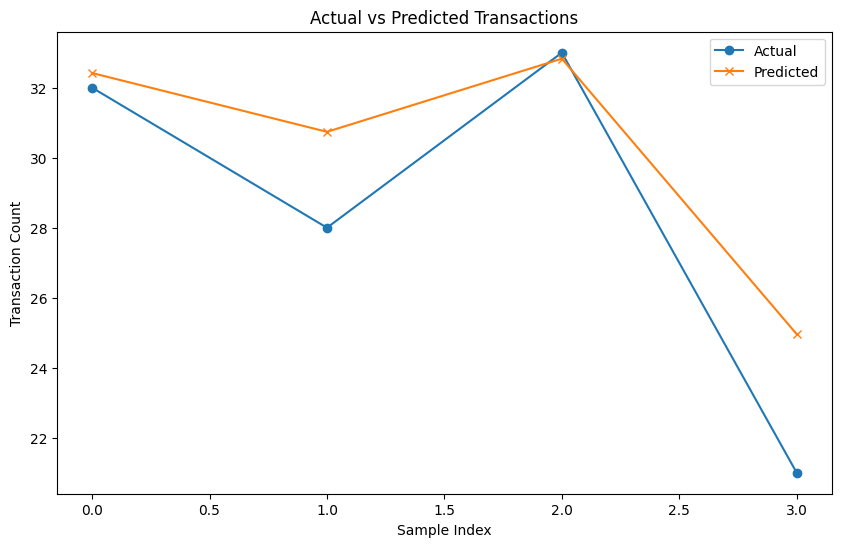

In [15]:
import matplotlib.pyplot as plt

# Create a DataFrame to compare actual vs predicted values
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Reset the index to ensure proper alignment for plotting
comparison_df = comparison_df.reset_index(drop=True)

# Print the actual vs predicted values
print(comparison_df)

# Plot actual vs predicted values
plt.figure(figsize=(10,6))
plt.plot(comparison_df['Actual'], label='Actual', marker='o')
plt.plot(comparison_df['Predicted'], label='Predicted', marker='x')
plt.title('Actual vs Predicted Transactions')
plt.xlabel('Sample Index')
plt.ylabel('Transaction Count')
plt.legend()
plt.show()
